# Loan Data Exploration
## Preliminary Wrangling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
print(df.describe())
print("*"*60)
print(df.info())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [5]:
#Nice stats to plot vis a vis occupation or state
df.DebtToIncomeRatio.unique()

array([0.17   , 0.18   , 0.06   , ..., 0.3108 , 0.07419, 0.23284])

### Observations:

1. Mean Loan term is approx 40 years. 75% borrowers have taken loan for 36 years.  
2. 75% Borrowers have taken loan on 25% BorrowerRate

In [6]:
df.Term.unique()

array([36, 60, 12], dtype=int64)

In [7]:
#snaity check
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### BroserRate Distribution Plot
1. The plot is created to see distribution of BrowerRate in the Data Set
2. The plot shows concentration of entries till about 20% Rate.

Text(0.5, 1.0, 'BorrowerRate Distribution')

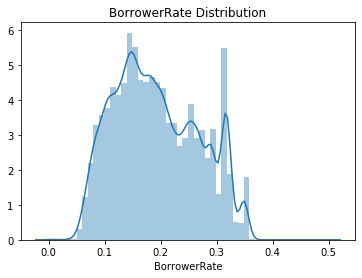

In [8]:
#Univariate Plot
sns.distplot(df['BorrowerRate'])
plt.title('BorrowerRate Distribution')

### Findings Loan Status, Loan Original Amount Box Plot

1. Maximum value loan looks to be in current loan category
2. There are more loans below 10000 in current loan category
3. In dues categories there are maximum number of loans due in >120 days category

Text(0.5, 1.0, 'Loan Status Box LoanOriginalAmount Distribution Box Plot')

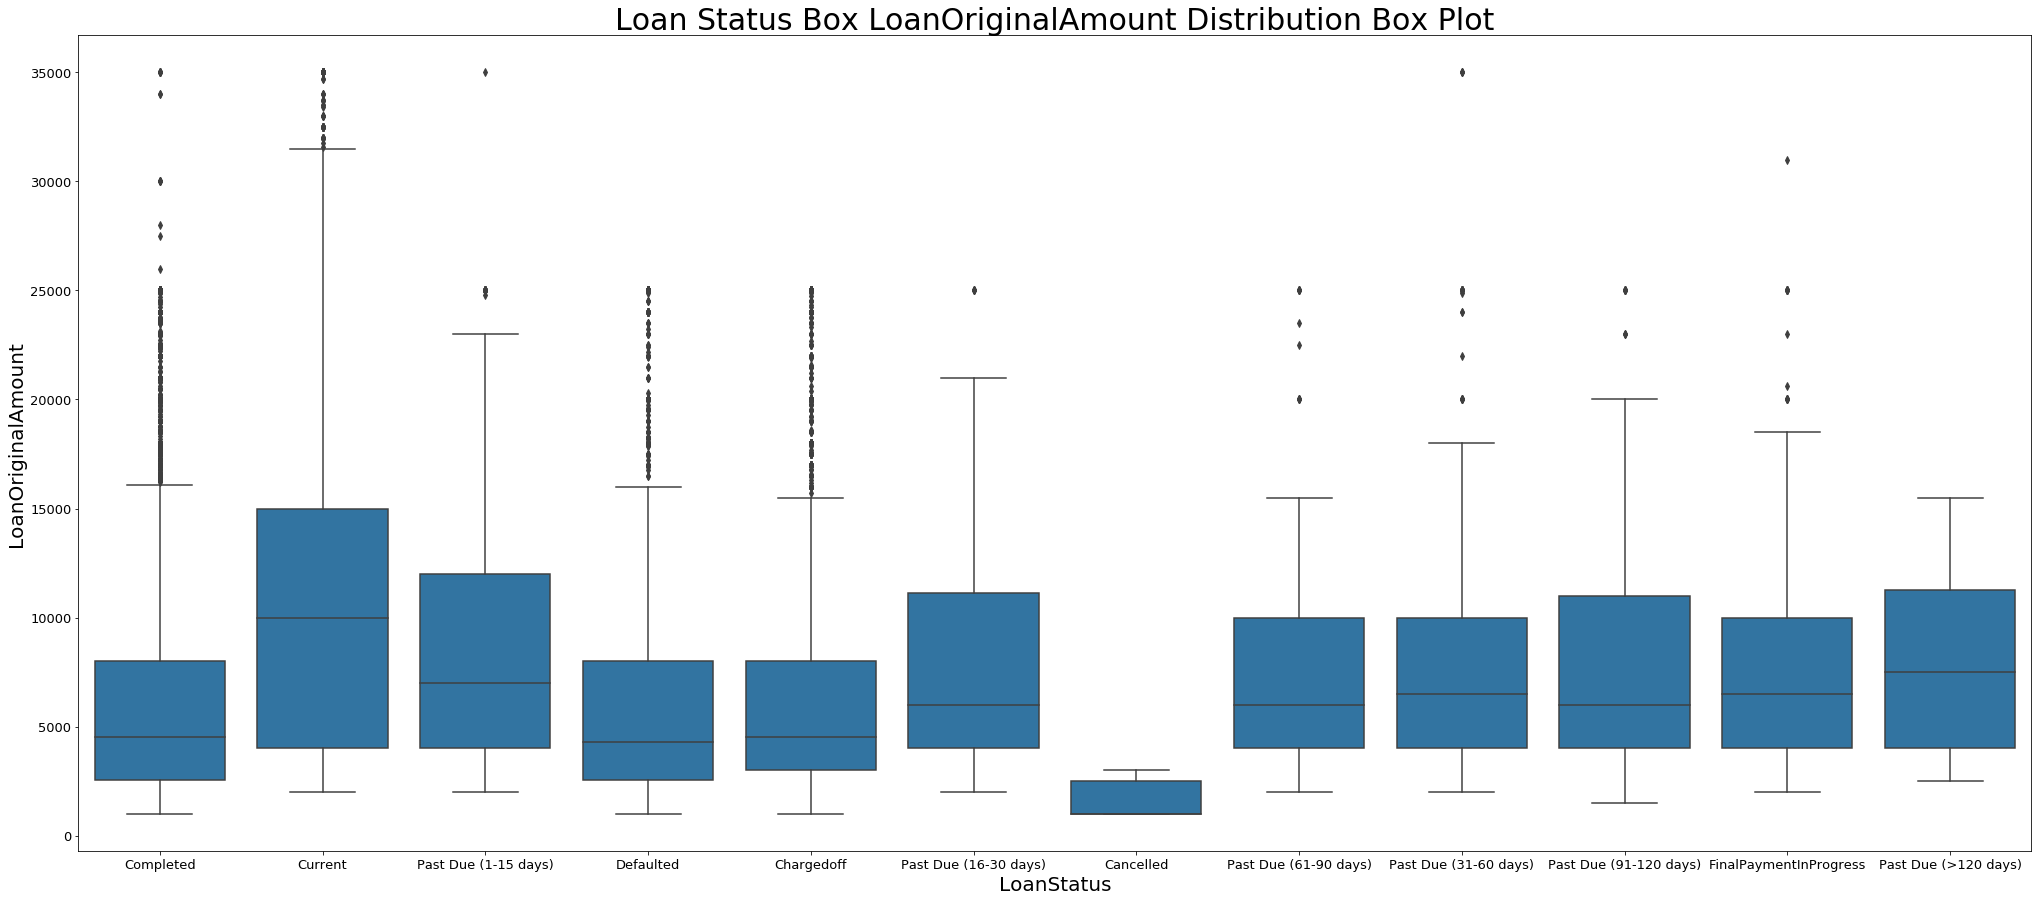

In [9]:
#Bi-variate box plot
plt.figure(figsize=[35,15])
base_color = sns.color_palette()[0]
ax = sns.boxplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
ax.tick_params(labelsize=13)
ax.set_xlabel(xlabel='LoanStatus', fontsize=20)
ax.set_ylabel(ylabel='LoanOriginalAmount', fontsize=20)
plt.title('Loan Status Box LoanOriginalAmount Distribution Box Plot', fontsize=30)

In [10]:
# checking total listingkeys
df.ListingKey.count()

113937

In [11]:
# checking unique values including ListingKey uniques
df.nunique();

In [12]:
# Checking how does the duplicate rows look like, also how may rows have duplicates?
df[df.ListingKey.duplicated(keep=False)].sort_values("ListingKey")

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
33220,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27677,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
788,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27360,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
18324,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [13]:
#seems there are completely(all columns) duplicate rows in the data set for example:
df[df['ListingKey'] == '0F563597161095613517437']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
104257,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [14]:
#There are 1698 such duplicate rows, which we can drop
duplicate_df = df[df.ListingKey.duplicated(keep=False)].sort_values("ListingKey").shape
duplicate_df

(1698, 81)

In [15]:
#dropping the duplicates
df.drop_duplicates(subset='ListingKey', keep='first', inplace=True)

In [16]:
#checking what all columns we have in the data set 
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

#### BroserRate LenderYield Scatter Plot
1. The plot is created to see correlation between quantitative variables BorrowerRate and LenderYield
2. As expected, the variatbles show a strong correlation. 

Text(0.5, 1.0, 'BorrowerRate and LenderYield Correlation Scatter Plot')

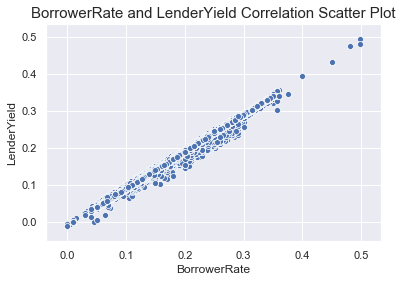

In [17]:
sns.set(font_scale=1)
base_color = sns.color_palette()[0]
sns.scatterplot(x='BorrowerRate', y='LenderYield', data=df, color=base_color)
plt.title('BorrowerRate and LenderYield Correlation Scatter Plot', fontsize=15)

In [18]:
# Checking the strong correlation as indicated by above scatter plot
df['BorrowerRate'].corr(df['LenderYield'])

0.9992073582842514

#### Occupation Borrowers count Bar chart
1. The plot is created to see which are the top borrowing professions
2. Computer Programmers, Analyst and Teachers are among top 10 borrowers

[Text(0, 0.5, 'Total Borrowed Amount')]

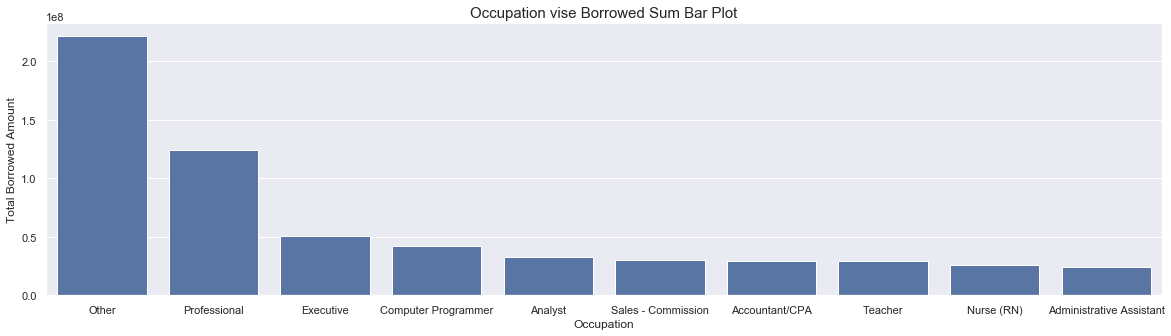

In [19]:
# Which are the top borrowing professions
plt.figure(figsize=[20, 5])
df_profession_loan = df.groupby(['Occupation'])['LoanOriginalAmount'].sum().sort_values(ascending=False).reset_index(name='borrowed_sum')
base_color = sns.color_palette()[0]
ax=sns.barplot(x='Occupation', y='borrowed_sum', data=df_profession_loan.head(10), color=base_color)
plt.title('Occupation vise Borrowed Sum Bar Plot', fontsize=15)
ax.set(ylabel='Total Borrowed Amount')

#### Occupation Borrowers Violin plot
1. The plot is created to see how loan amount is distributed within a paricular occupation
2. Teachers and Administrative Assistants seem to have more lower values loans

Text(0.5, 1.0, 'Occupation vise LoanOriginalAmount Violin Plot')

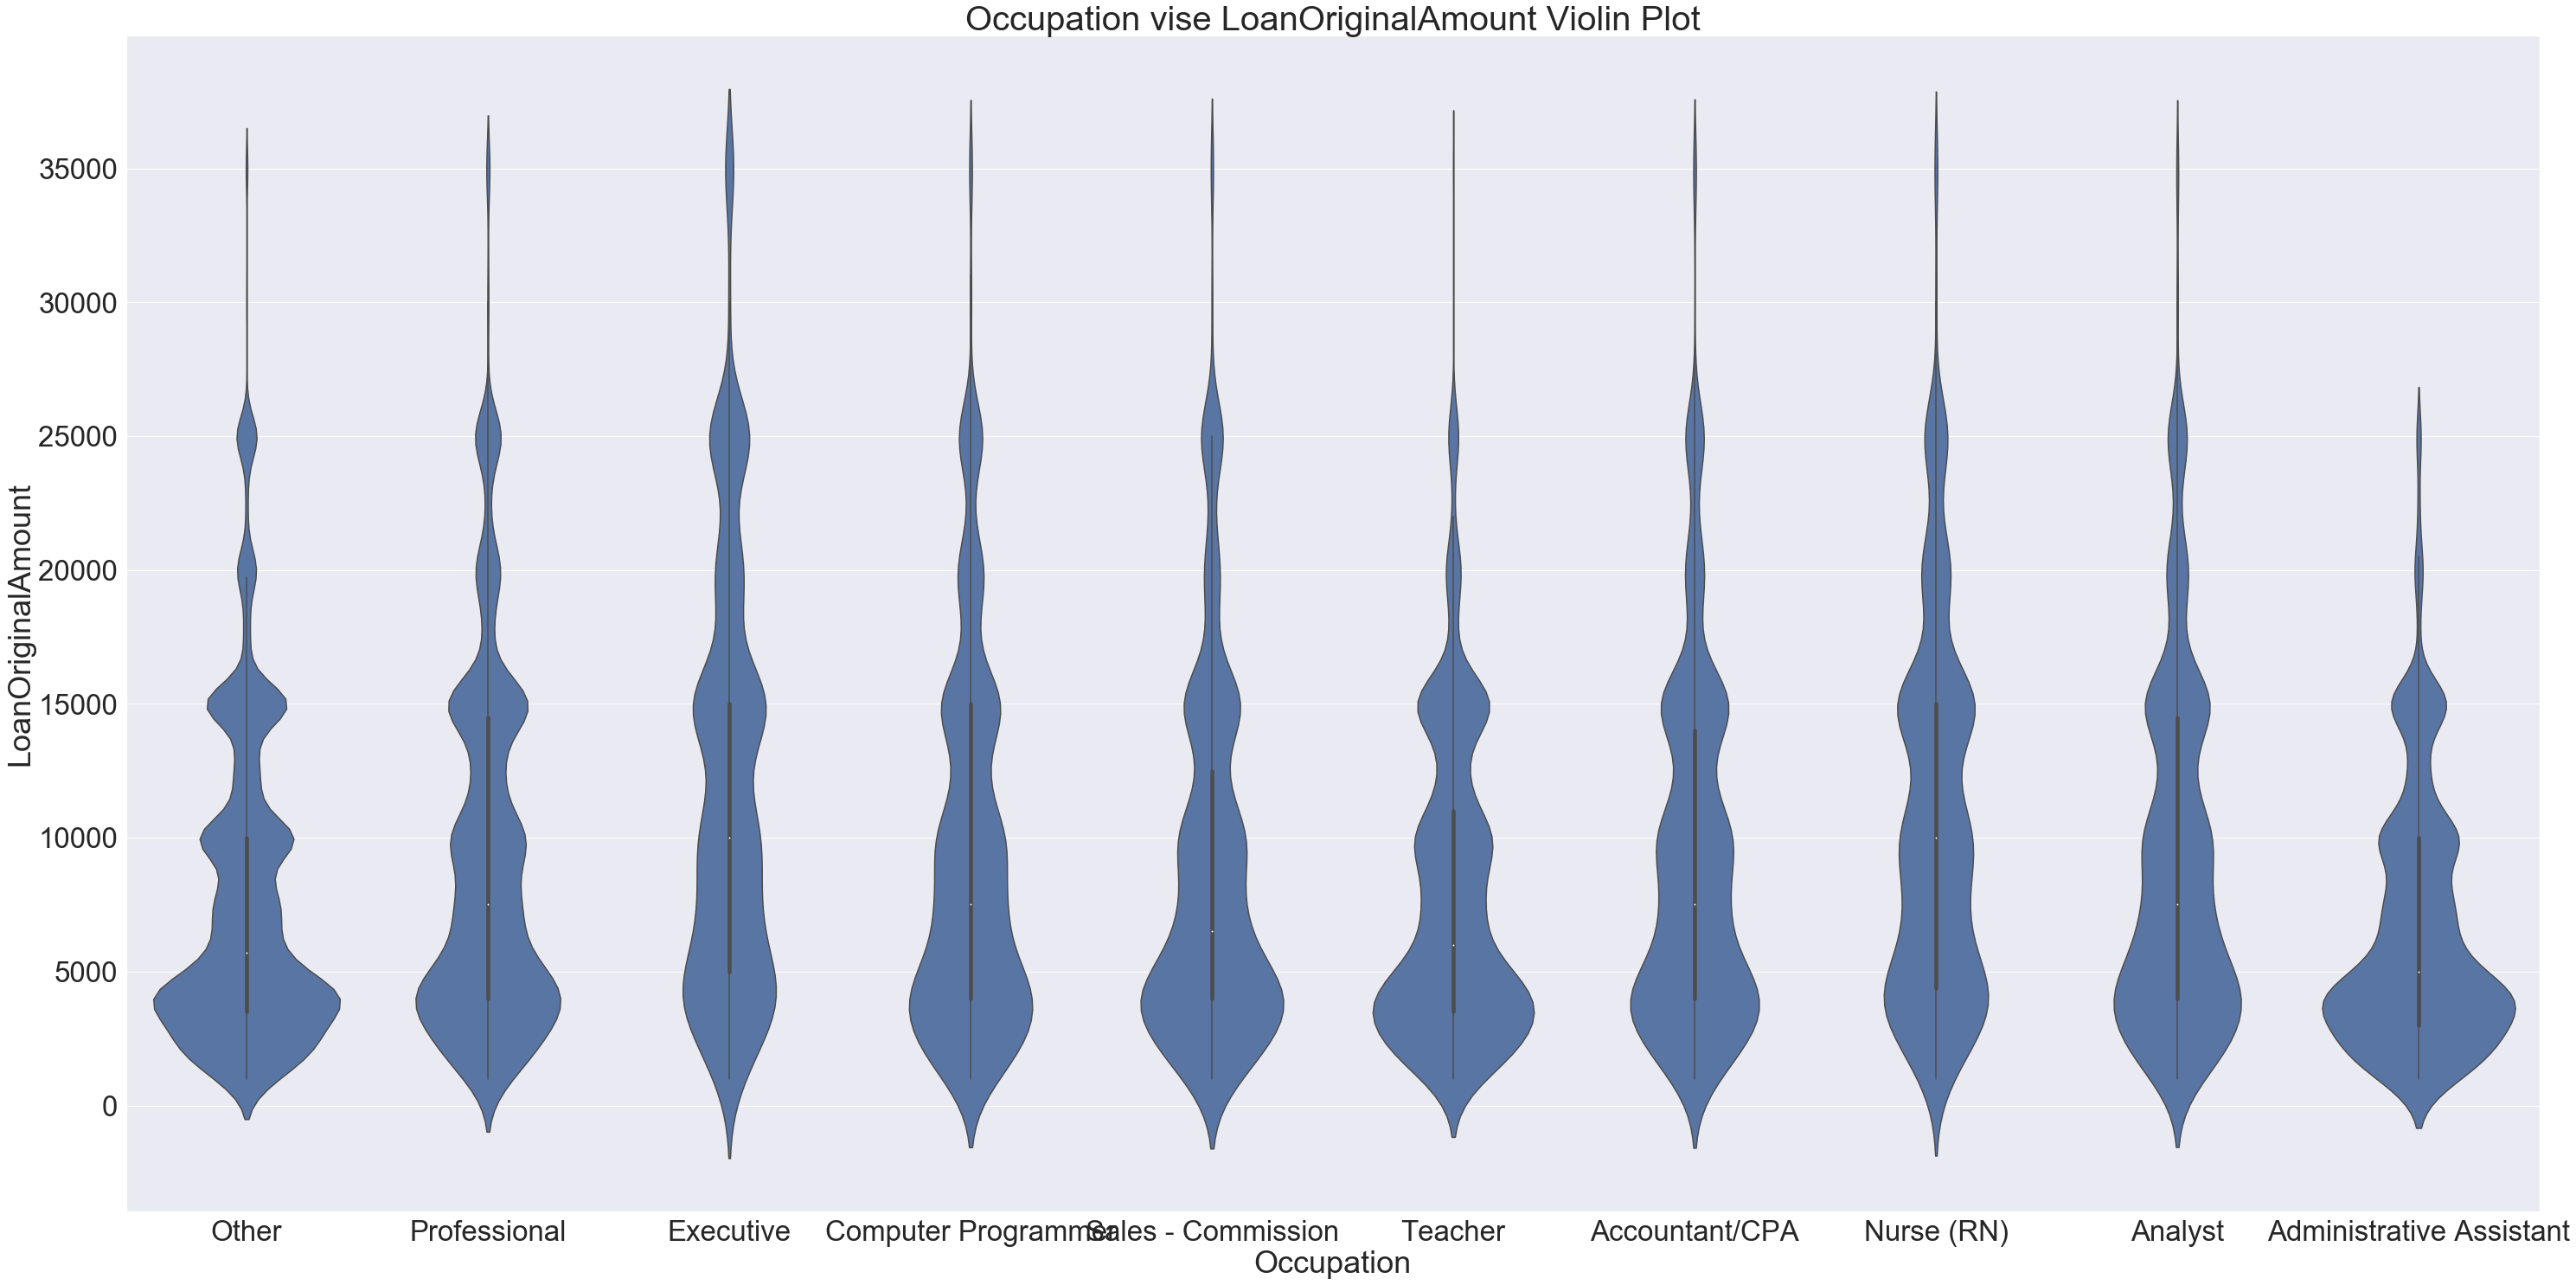

In [20]:
#Violin plot for top ten borrowing professions
sns.set(font_scale=3)
plt.figure(figsize=[50, 25])
base_color = sns.color_palette()[0]
sns.violinplot(x='Occupation' , y='LoanOriginalAmount', data=df[df['Occupation'].isin(['Other', 'Professional', 'Executive', 'Computer Programmer','Analyst', 'Sales - Commission', 'Accountant/CPA','Teacher','Nurse (RN)', 'Administrative Assistant'])], color=base_color)
plt.title('Occupation vise LoanOriginalAmount Violin Plot', fontsize=40)

#### Correlation Heatmap
1. The plot is created to see correlation among different columns in the Data Set

### Findings

1. Following group of columns have good postive correlation with each other: TotalCreditLinespast7years, CurrentCreditLines, OpenCreditLines, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment
	  
2. Following group of columns have good postive correlation with each other: BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn

3. TotalTrades is having good postive correlation with TotalCreditLinespast7years, CurrentCreditLines, OpenCreditLines, OpenRevolvingAccounts

In [21]:
# Multi variate plot
sns.set(font_scale=10)
select_var = ['TotalCreditLinespast7years', 'CurrentCreditLines', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',  'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn' ]
df_corr = df[select_var].copy()
plt.figure(figsize=[250, 250])
plt.yticks(fontsize=100)
ax=sns.heatmap(df_corr.corr(), vmin=0, vmax=0.5, cmap='coolwarm', square=True, annot=True, fmt='.2f', linewidth=.25)
ax.tick_params(labelbottom='on',labeltop='on')
plt.xticks(rotation=90)
plt.xticks(fontsize=100)
plt.title('Correlation Heat Map of all Columns', fontsize=300)

Text(0.5, 1, 'Correlation Heat Map of all Columns')

In [22]:
#Are there any data type issues in the data set?
print(df.shape)
print(df.dtypes)
# ListingCreationDate, ClosedDate,  should be date time object

(113066, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [23]:
# What are all the Alpha unique ratings in the data set
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

#### Prosperity Rating Count Bar Plot
1. The plot is created to see how proper ratings are distributed in the Data Set
2. C is the most common Prosper Rating 

[Text(0, 0.5, 'Number of Borrowers'), Text(0.5, 0, 'Rating(Alpha)')]

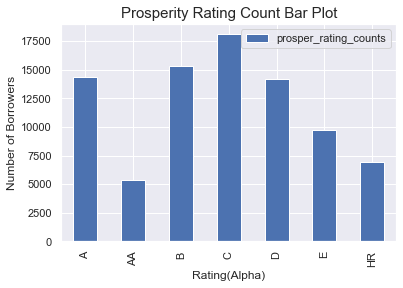

In [30]:
#prosper rating plot; checking how may entries below to certain rating?
sns.set(font_scale=1)
df_alfa_rating = df.groupby(['ProsperRating (Alpha)']).size().reset_index(name='prosper_rating_counts')
ax=df_alfa_rating.plot.bar(x='ProsperRating (Alpha)')
plt.title('Prosperity Rating Count Bar Plot', fontsize=15)
ax.set(xlabel='Rating(Alpha)', ylabel='Number of Borrowers')

#### Borrowers count state vise Bar plot
1. The plot is created to see which states have more number of borrowers
2. CA seems to have very high number of borrowers in comparison to other states

[Text(0, 0.5, 'Number of Borrowers')]

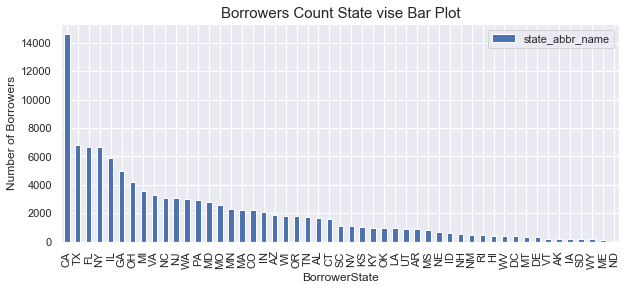

In [35]:
#Where the borrowers are from, checking using pandas groupby and bar plot?
df_state = df.groupby(['BorrowerState']).size().sort_values(ascending=False).reset_index(name='state_abbr_name')
ax=df_state.plot.bar(x='BorrowerState', figsize=(10,4))
plt.title('Borrowers Count State vise Bar Plot', fontsize=15)
ax.set(ylabel='Number of Borrowers')

#### Borrowers count occupationtype vise Bar plot
1. The plot is created to see which occupation types have more number of borrowers
2. Seems highest number of borrowers in the data set are Employed

[Text(0, 0.5, 'Number of Borrowers')]

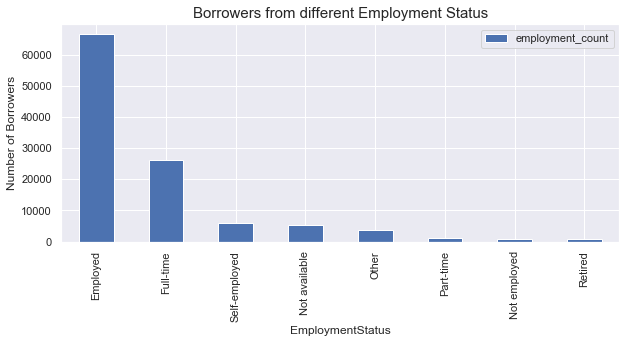

In [36]:
# More borrowers belong to which Employment status?
df.EmploymentStatus.unique()
df_employ_status = df.groupby(['EmploymentStatus']).size().sort_values(ascending=False).reset_index(name='employment_count')
ax=df_employ_status.plot.bar(x='EmploymentStatus', figsize=(10,4))
plt.title('Borrowers from different Employment Status', fontsize=15)
ax.set(ylabel='Number of Borrowers')

#### House owners vs Non house owners borrowers count Pie chart
1. The plot is created to see houseoweners or non house owners have more number of borrowers
2. Seems home owner borrowes are almost same as non home owner borrowers

Text(0.5, 1.0, 'House Owner vs. Non House Owner(Borrowers Count) Pie Chart')

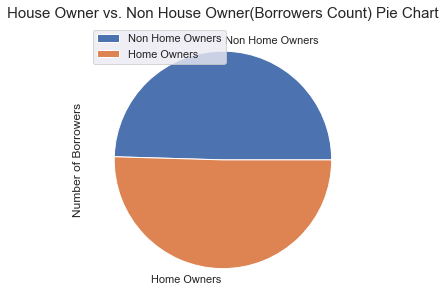

In [49]:
# How many borrowers are homeowners and how many are not home owners?
df.IsBorrowerHomeowner.unique()
df_homeowner = df.groupby(['IsBorrowerHomeowner']).size().reset_index(name='Number of Borrowers')
df_homeowner.rename(index={0:'Non Home Owners', 1:'Home Owners'}, inplace=True)
ax=df_homeowner.plot.pie(y='Number of Borrowers', figsize=(5,5))
ax.legend(loc='upper left')
plt.title('House Owner vs. Non House Owner(Borrowers Count) Pie Chart', fontsize=15)

#### House owners vs Non house owners borrowered amount Pie chart
1. The plot is created to see houseoweners or non house owners have borrowed more amount
2. Seems, non home oweners have borrowed more than home owners.

Text(0.5, 1.0, 'House Owner vs. Non House Owner(Borrowers Amount)')

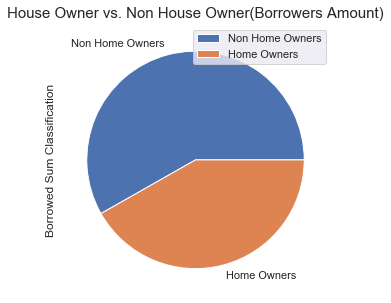

In [48]:
# Does the amount of loan vary significantly between home owners and non home owners?
df_homeowner_borrowed_sum = df.groupby(['IsBorrowerHomeowner'])['LoanOriginalAmount'].sum().sort_values(ascending=False).reset_index(name='Borrowed Sum Classification')
df_homeowner_borrowed_sum.rename(index={0:'Non Home Owners', 1:'Home Owners'}, inplace=True)
df_homeowner_borrowed_sum.plot.pie(y='Borrowed Sum Classification', figsize=(5,5))
plt.title('House Owner vs. Non House Owner(Borrowers Amount)', fontsize=15)

#### Borrowered amount state wise bar plot
1. The plot is created to see which states have borrowed higher amount
2. CA seems to have not just very high number of borrowers but also borrowed amount is also highest in comparison to other states

Text(0.5, 1.0, 'State vise sum of LoanOriginalAmount')

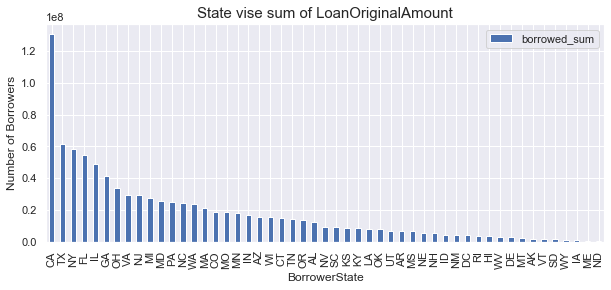

In [50]:
# Which states borrowed more money?
df_borrowed_sum = df.groupby(['BorrowerState'])['LoanOriginalAmount'].sum().sort_values(ascending=False).reset_index(name='borrowed_sum')
ax=df_borrowed_sum.plot.bar(x='BorrowerState', figsize=(10,4))
ax.set(ylabel='Number of Borrowers')
plt.title('State vise sum of LoanOriginalAmount', fontsize=15)